In [3]:
import numpy as np
import pandas as pd

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# pandas의 데이터 구조#2. DataFrame

- Pandas에서 주로 다루는 단위
- spreadsheet와 같은 개념
- Structured Data, Panel Data 또는 Tabular Data라고 부름
- pandas를 공부한다는 것 == dataframe의 사용법과 활용법을 배운다
- pandas를 잘 활용하면 대부분의 structured data를 자유자재로 다룰 수 있게 됨

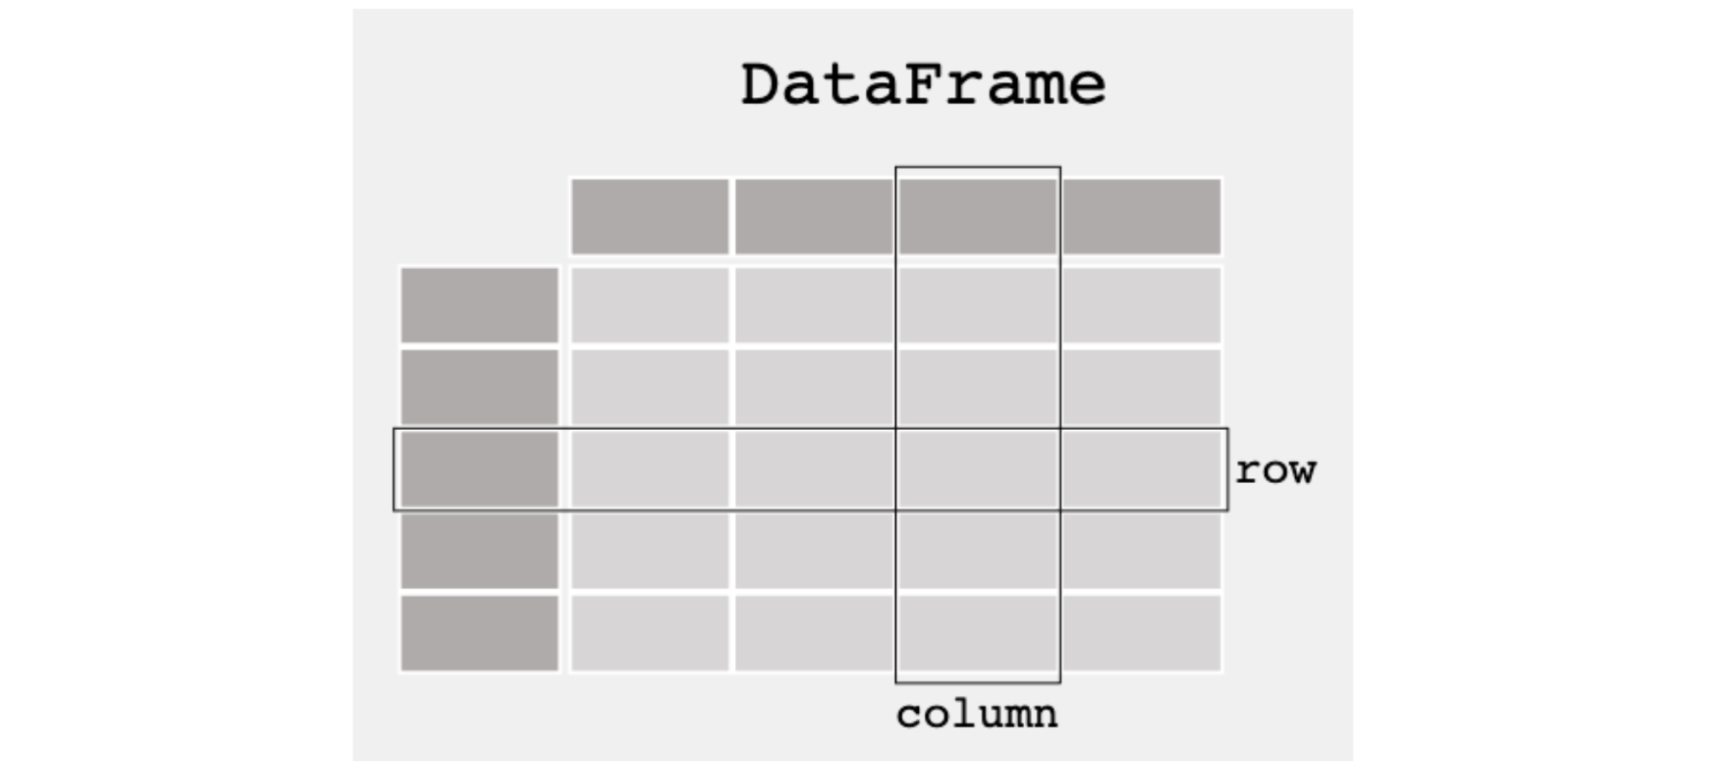

### 데이터 프레임 특징
- 행과 열로 만들어지는 2차원 배열 구조
- 2차원 행렬 데이터에 인덱스를 붙인 것
- R의 데이터프레임에서 유래
- 데이프레임의 각 열은 시리즈로 구성되어 있음

## 1. 데이터 프레임 생성

**DataFrame(data=None, index=None(행), columns=None(열), dtype=None, copy=None)함수 사용**

- data : array-like, Iterable, dict, or scalar value
- index : index or array-like
- column : index or array-like
- dtype : dtype

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

### 1) 리스트로 데이터 프레임 만들기

- DataFrame([[list1],[list2]]) 
- 각 list는 한 행으로 구성됨
- 행의 원소 개수가 다르면 None 값으로 저장

In [5]:
pd.DataFrame([1,2,3,4]).shape

(4, 1)

In [10]:
# 2차원 리스트를 이용해서 데이터프레임 생성
df1 = pd.DataFrame([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
df1
df1.shape
df1.size

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


(3, 4)

12

In [8]:
# 각 행의 요소 수가 다른 경우 NaN이 채워짐
pd.DataFrame([[1,2,3,4],[5,6,7],[9,10,11,12]])

,0,1,2,3
0,1,2,3,4.0
1,5,6,7,NaN
2,9,10,11,12.0


(3, 4)

In [11]:
df1.index
df1.columns
df1.values

RangeIndex(start=0, stop=3, step=1)

RangeIndex(start=0, stop=4, step=1)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]], dtype=int64)

**자동으로 생성된 index와 column을 갖는 DataFrame 데이터**

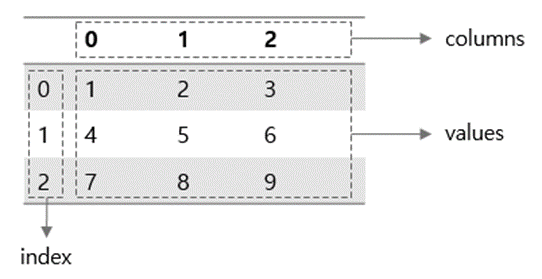

### 2) 딕셔너리로 데이터프레임 생성

**dict의 key → column**

In [14]:
data = {'kor':[90,80,100],
        'eng':[85,88,90],
        'sci':[100,60,80],
        'math':[90,50,60]}


df2 = pd.DataFrame(data)
df2

,kor,eng,sci,math
0,90,85,100,90
1,80,88,60,50
2,100,90,80,60


In [15]:
data2={'2015': [9904312, 3448737, 2890451, 2466052],
       '2016': [9631482, 3393191, 2632035, 2000002],
       '2017': [9762546, 3512547, 2517680, 2456016],
       '2018': [9912345, 1513057, 2648043, 2504991]}
data2

{'2015': [9904312, 3448737, 2890451, 2466052],
 '2016': [9631482, 3393191, 2632035, 2000002],
 '2017': [9762546, 3512547, 2517680, 2456016],
 '2018': [9912345, 1513057, 2648043, 2504991]}

In [18]:
df3 = pd.DataFrame(data=data2, index=['서울', '부산', '인천', '대구'])
df3

,2015,2016,2017,2018
서울,9904312,9631482,9762546,9912345
부산,3448737,3393191,3512547,1513057
인천,2890451,2632035,2517680,2648043
대구,2466052,2000002,2456016,2504991


### 3) 시리즈로 데이터 프레임 생성

**각 Series의 인덱스 → column**

In [19]:
a = pd.Series([100,200,300], index='a b c'.split())
b = pd.Series([100,201,303], index='a b k'.split())
c = pd.Series([140,210,320], index='a b e'.split())
pd.DataFrame([a,b,c])

,a,b,c,k,e
0,100.0,200.0,300.0,NaN,NaN
1,100.0,201.0,NaN,303.0,NaN
2,140.0,210.0,NaN,NaN,320.0


In [20]:
pd.DataFrame([a,b,c], index=[1000,1001,1002])

,a,b,c,k,e
1000,100.0,200.0,300.0,NaN,NaN
1001,100.0,201.0,NaN,303.0,NaN
1002,140.0,210.0,NaN,NaN,320.0


### 4) csv 데이터로 부터 Dataframe 생성

- 데이터 분석을 위해 dataframe을 생성하는 가장 일반적인 방법
- 데이터 소스로부터 추출된 csv(comma separated values) 파일로부터 생성
- **pandas.read_csv()** 함수 사용

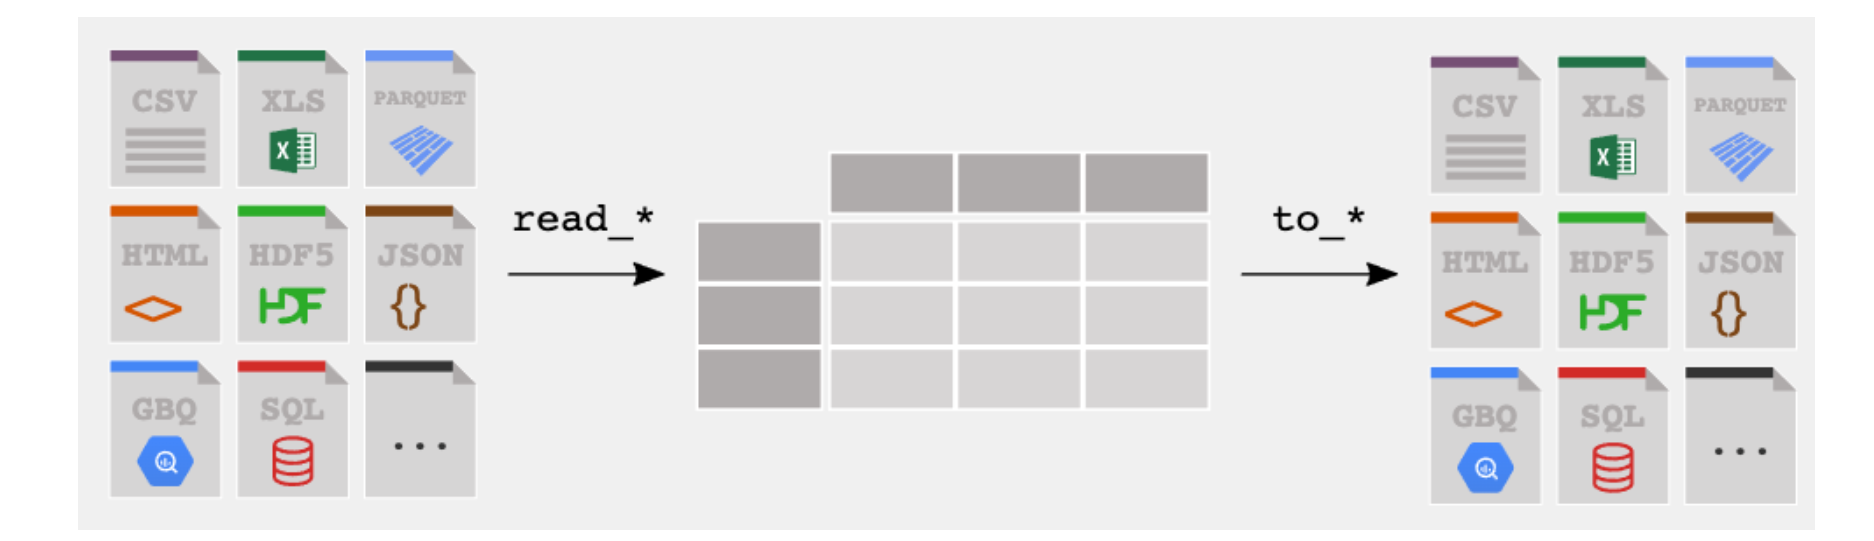

#### read_csv() 함수 파라미터
 - sep : 각 데이터 값을 구별하기 위한 구분자(separator) 설정 
 - header : header를 무시할 경우, None 설정
 - index_col : index로 사용할 column 설정
 - usecols : 실제로 dataframe에 로딩할 columns만 설정
 
 https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

#### 타이타닉 데이터 다운로드

data 출처: https://www.kaggle.com/hesh97/titanicdataset-traincsv/data

In [22]:
#titanic.csv 파일은 data 폴더 아래 저장
# data = pd.read_csv('./data/titanic.csv')
titanic = pd.read_csv('data/titanic.csv')

In [25]:
titanic.shape

(891, 12)

In [26]:
# 데이터프레임의 앞의 5개 관측값 출력
titanic.head()

titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [27]:
titanic.shape

(891, 12)

In [28]:
titanic.size

10692

In [29]:
type(titanic)

pandas.core.frame.DataFrame

In [34]:
# read_csv( , index_col = , usecols = ) index_col : 기존에 있는 column으로 인덱스 사용
titanic2 = pd.read_csv('data/titanic.csv', 
                    index_col = 'PassengerId') 
titanic2


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### csv 파일의 일부 컬럼만 가지는 데이터프레임 생성

In [36]:
# read_csv( , index_col = , usecols = )
titanic3 = pd.read_csv('data/titanic.csv', 
             index_col = 'PassengerId', 
             usecols = ['PassengerId', 'Pclass', 'Sex', 'Age'])  # usecols = 일부 컬럼만 가져옴

In [37]:
titanic3.tail()

,Pclass,Sex,Age
PassengerId,,,
887,2,male,27.0
888,1,female,19.0
889,3,female,NaN
890,1,male,26.0
891,3,male,32.0


#### 참고. 데이터프레임을 csv로 저장

https://pandas.pydata.org 의 API reference에서 함수 찾아보기
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [38]:
titanic3.to_csv('data/small_titanic.csv')

In [40]:
df=pd.DataFrame({'name':['kim', 'hong', 'park'],
                'year':[1990, 2001, 2010],
                'score':[100,150,80]})
df

,name,year,score
0,kim,1990,100
1,hong,2001,150
2,park,2010,80


In [42]:
df.to_csv('data/sample.csv', index=False)

## 2. 데이터프레임의 구조

### 1) 행/열 방향 인덱스

**인덱스(index)**
 - index 속성
 - 각 아이템을 특정할 수 있는 고유의 값을 저장
 - 복잡한 데이터의 경우, 멀티 인덱스로 표현 가능
 
 
**컬럼(columns)**
 - columns 속성
 - 각각의 특성(feature)을 나타냄
 - 복잡한 데이터의 경우, 멀티 컬럼으로 표현 가능

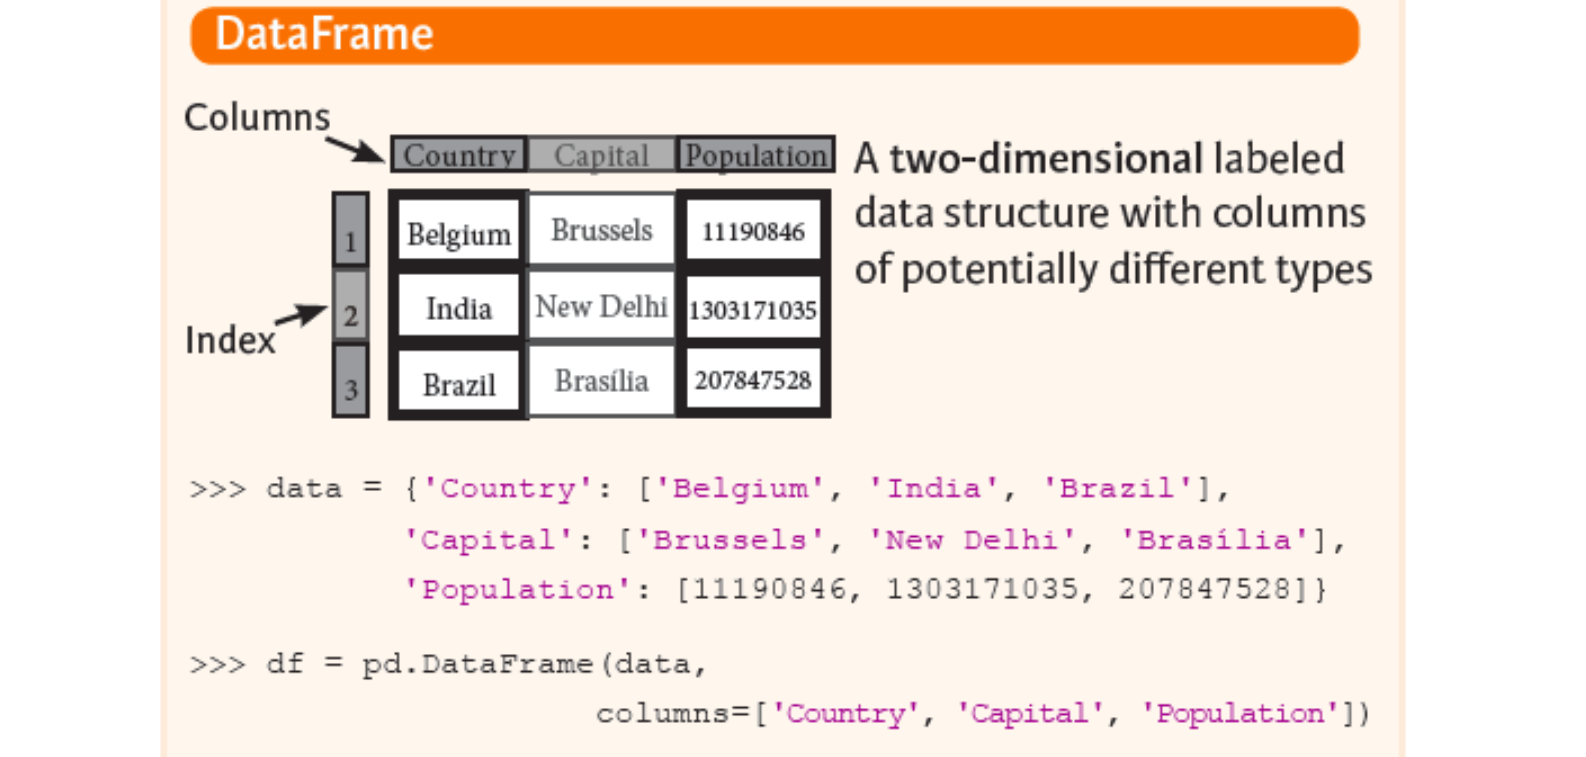

- 출처 : https://www.kdnuggets.com/2017/01/pandas-cheat-sheet.html

In [44]:
df

,name,year,score
0,kim,1990,100
1,hong,2001,150
2,park,2010,80


**데이터프레임의 열방향 인덱스와 행방향 인덱스**
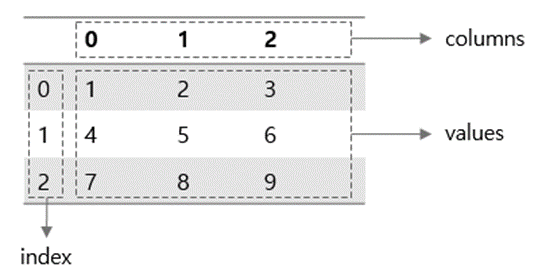

### 2) 행/열 인덱스 출력

In [45]:
df.columns

Index(['name', 'year', 'score'], dtype='object')

In [46]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
titanic3.columns

Index(['Pclass', 'Sex', 'Age'], dtype='object')

In [48]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [49]:
titanic3.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

### 3) 행/열 인덱스 이름 설정

- index.name 
- columns.name

In [50]:
df3

,2015,2016,2017,2018
서울,9904312,9631482,9762546,9912345
부산,3448737,3393191,3512547,1513057
인천,2890451,2632035,2517680,2648043
대구,2466052,2000002,2456016,2504991


In [51]:
df3.columns
df3.index

Index(['2015', '2016', '2017', '2018'], dtype='object')

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [52]:
df3.columns.name = '연도'
df3.index.name = '도시'

In [55]:
df3

연도,2015,2016,2017,2018
도시,,,,
서울,9904312,9631482,9762546,9912345
부산,3448737,3393191,3512547,1513057
인천,2890451,2632035,2517680,2648043
대구,2466052,2000002,2456016,2504991


In [56]:
df3.columns
df3.index

Index(['2015', '2016', '2017', '2018'], dtype='object', name='연도')

Index(['서울', '부산', '인천', '대구'], dtype='object', name='도시')

### 4) 데이터프레임의 값 접근

**values 속성**

In [57]:
# 데이터만 접근할 경우 values 속성 사용 : np.arrary() 형식
df3.values

array([[9904312, 9631482, 9762546, 9912345],
       [3448737, 3393191, 3512547, 1513057],
       [2890451, 2632035, 2517680, 2648043],
       [2466052, 2000002, 2456016, 2504991]], dtype=int64)

## 3. 데이터프레임의 데이터 파악하기
 - shape 속성 (row, column)
 - describe() 함수 : 숫자형 데이터의 통계치 계산
 - info() 함수 : 데이터 타입, 각 아이템의 개수 등 출력

### shape : 데이터프레임의 행,렬 개수 출력

In [60]:
df3
df3.shape
df3.size

연도,2015,2016,2017,2018
도시,,,,
서울,9904312,9631482,9762546,9912345
부산,3448737,3393191,3512547,1513057
인천,2890451,2632035,2517680,2648043
대구,2466052,2000002,2456016,2504991


(4, 4)

16

### info() : 데이터프레임 개요

In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 서울 to 대구
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2015    4 non-null      int64
 1   2016    4 non-null      int64
 2   2017    4 non-null      int64
 3   2018    4 non-null      int64
dtypes: int64(4)
memory usage: 160.0+ bytes


In [62]:
# 타이타닉 데이터 개요
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### describe(): 수치형 데이터의 기술통계 출력

In [64]:
df3
df3.describe()

연도,2015,2016,2017,2018
도시,,,,
서울,9904312,9631482,9762546,9912345
부산,3448737,3393191,3512547,1513057
인천,2890451,2632035,2517680,2648043
대구,2466052,2000002,2456016,2504991


연도,2015,2016,2017,2018
count,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
mean,4.677388e+06,4.414178e+06,4.562197e+06,4.144609e+06
std,3.507776e+06,3.524531e+06,3.500545e+06,3.878140e+06
min,2.466052e+06,2.000002e+06,2.456016e+06,1.513057e+06
25%,2.784351e+06,2.474027e+06,2.502264e+06,2.257008e+06
50%,3.169594e+06,3.012613e+06,3.015114e+06,2.576517e+06
75%,5.062631e+06,4.952764e+06,5.075047e+06,4.464118e+06
max,9.904312e+06,9.631482e+06,9.762546e+06,9.912345e+06


In [65]:
# 타이타닉 데이터
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
titanic3.describe()

,Pclass,Age
count,891.000000,714.000000
mean,2.308642,29.699118
std,0.836071,14.526497
min,1.000000,0.420000
25%,2.000000,20.125000
50%,3.000000,28.000000
75%,3.000000,38.000000
max,3.000000,80.000000


##### 참고. 데이터 유형
- 수치형 데이터 : 평균, 분산, 최솟값, 최댓값, 중위수, 사분위수
    - 예) 타이타닉 데이터의 경우 Age, SibSp
- 범주형 데이터 : 빈도, 비율
    - 예) 타이타닉 데이터의 경우 Sex, Pclass
    


- PassengerID : 범주형 (명목형)
- Pclass : 범주형 (순서형)
- Sex : 범주형 (명목형)
- Age : 수치형(비율형) => 사칙연산 가능


## 4. 데이터프레임 변경

### 1) 데이터프레임 전치

- pandas의 데이터 프레임은 전치를 포함해서 Numpy 2차원 배열의 대부분 속성이나 메서드를 지원.

- 전치 : 행과 열을 바꾸는 기능

In [68]:
df3

연도,2015,2016,2017,2018
도시,,,,
서울,9904312,9631482,9762546,9912345
부산,3448737,3393191,3512547,1513057
인천,2890451,2632035,2517680,2648043
대구,2466052,2000002,2456016,2504991


In [71]:
df4 = df3.T
df4

도시,서울,부산,인천,대구
연도,,,,
2015,9904312,3448737,2890451,2466052
2016,9631482,3393191,2632035,2000002
2017,9762546,3512547,2517680,2456016
2018,9912345,1513057,2648043,2504991


### 2) 열(column) 추가

#### 해당열이 있으면 내용 갱신, 열이 없으면 추가

- 열추가 : df[열이름(key)]=values
- 열 내용 갱신 : df[열이름(key)]=values

In [ ]:
df3
df.columns

In [82]:
df3['2015']
type(df3['2015'])
df3['2015'].index

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 2015, dtype: int64

pandas.core.series.Series

Index(['서울', '부산', '인천', '대구'], dtype='object', name='도시')

In [83]:
df3['평균'] = (df3['2015'] +df3['2016'] +df3['2017'] +df3['2018'])/4
df3

연도,2015,2016,2017,2018,평균
도시,,,,,
서울,9904312,9631482,9762546,9912345,9802671.25
부산,3448737,3393191,3512547,1513057,2966883.00
인천,2890451,2632035,2517680,2648043,2672052.25
대구,2466052,2000002,2456016,2504991,2356765.25


In [84]:
df3['지역']=['수도권','경상권', '수도권','경상권']
df3

연도,2015,2016,2017,2018,평균,지역
도시,,,,,,
서울,9904312,9631482,9762546,9912345,9802671.25,수도권
부산,3448737,3393191,3512547,1513057,2966883.00,경상권
인천,2890451,2632035,2517680,2648043,2672052.25,수도권
대구,2466052,2000002,2456016,2504991,2356765.25,경상권


### 3) 열(column) 삭제

**del df[삭제열]**

In [85]:
del df3['지역']
df3

연도,2015,2016,2017,2018,평균
도시,,,,,
서울,9904312,9631482,9762546,9912345,9802671.25
부산,3448737,3393191,3512547,1513057,2966883.00
인천,2890451,2632035,2517680,2648043,2672052.25
대구,2466052,2000002,2456016,2504991,2356765.25


In [86]:
del df3['평균']
df3

연도,2015,2016,2017,2018
도시,,,,
서울,9904312,9631482,9762546,9912345
부산,3448737,3393191,3512547,1513057
인천,2890451,2632035,2517680,2648043
대구,2466052,2000002,2456016,2504991


## 5. 데이터 프레임 인덱싱

- 열단위 인덱싱  `[ ]`
- 인덱서(loc, iloc)를 사용하지 않는 행단위 인덱싱  `[ : ]`
- 개별 요소 접근 `[열][행]`

### 1) 열단위 인덱싱

- 열 라벨(컬럼명)을 키값으로 생각하고 인덱싱
- `[ ]`기호 또는 `df.열이름`을 이용
    - [ ]는 열 위주 인덱싱이 원칙
- 인덱스로 라벨값을 하나 넣으면 시리즈 객체가 반환
- 라벨의 배열이나 리스트를 넣으면 부분적 df 가 반환

In [87]:
df3

연도,2015,2016,2017,2018
도시,,,,
서울,9904312,9631482,9762546,9912345
부산,3448737,3393191,3512547,1513057
인천,2890451,2632035,2517680,2648043
대구,2466052,2000002,2456016,2504991


In [88]:
df3['지역']=['수도권', '경상권', '수도권', '경상권']
df3

연도,2015,2016,2017,2018,지역
도시,,,,,
서울,9904312,9631482,9762546,9912345,수도권
부산,3448737,3393191,3512547,1513057,경상권
인천,2890451,2632035,2517680,2648043,수도권
대구,2466052,2000002,2456016,2504991,경상권


In [89]:
df3['2015']

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 2015, dtype: int64

In [91]:
# 열단위 인덱싱은 시리즈 데이터로 반환
type(df3['지역'])

pandas.core.series.Series

In [92]:
df3.지역

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [95]:
# KeyError : 행이름 (row index) 사용할 수 없음
# df3['서울']

In [96]:
# KeyError : 정수 인덱스 형식으로 column 인덱스를 사용하지 못함
# df3[0]

In [99]:
# 예외처리
try:
    df3['서울']
except Exception as e:
    print(type(e))

<class 'KeyError'>


#### 추출한 열을 데이터프레임으로 받기

- 리스트로 인덱싱

In [100]:
df3[['지역']]

연도,지역
도시,
서울,수도권
부산,경상권
인천,수도권
대구,경상권


In [101]:
type(df3[['2015']])

pandas.core.frame.DataFrame

#### 리스트를 사용하여 여러 개 열 추출

In [102]:
# 데이터 프레임으로 반환
df3[['2015','2018']]

연도,2015,2018
도시,,
서울,9904312,9912345
부산,3448737,1513057
인천,2890451,2648043
대구,2466052,2504991


#### 열이름(컬럼명)이 문자열인 경우 위치인덱스 사용 불가
- 수치 인덱스를 사용할 수 없음
- keyerror 발생

In [109]:
df2
# df2[0] --> KeyError 발생

,kor,eng,sci,math
0,90,85,100,90
1,80,88,60,50
2,100,90,80,60


#### 열이름이 수치인 경우(위치인덱스)

In [105]:
np.arange(1,13).reshape(3,4)
df5 = pd.DataFrame(np.arange(1,13).reshape(3,4))
df5

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


In [106]:
df5.columns

RangeIndex(start=0, stop=4, step=1)

In [107]:
# 시리즈 반환
df5[0]

0    1
1    5
2    9
Name: 0, dtype: int32

In [110]:
# 데이터 프레임 반환
df5[[0,2]]

,0,2
0,1,3
1,5,7
2,9,11


### 2) 행 단위 인덱싱

- **슬라이싱(slicing)** 사용
    - 열단위 인덱싱과 구분하기 위해
    - 인덱스 값이 문자(label)인 경우 문자 슬라이싱
- 인덱서(loc, iloc) 사용

In [111]:
df3

연도,2015,2016,2017,2018,지역
도시,,,,,
서울,9904312,9631482,9762546,9912345,수도권
부산,3448737,3393191,3512547,1513057,경상권
인천,2890451,2632035,2517680,2648043,수도권
대구,2466052,2000002,2456016,2504991,경상권


#### 한개의 행 추출

In [114]:
df3[:'서울']


연도,2015,2016,2017,2018,지역
도시,,,,,
서울,9904312,9631482,9762546,9912345,수도권


In [115]:
df3['서울':'서울']

연도,2015,2016,2017,2018,지역
도시,,,,,
서울,9904312,9631482,9762546,9912345,수도권


In [116]:
df5

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


In [117]:
df5[:1]

,0,1,2,3
0,1,2,3,4


In [118]:
df5[1:2]

,0,1,2,3
1,5,6,7,8


#### 여러 행 추출

In [119]:
df3['서울':'부산']

연도,2015,2016,2017,2018,지역
도시,,,,,
서울,9904312,9631482,9762546,9912345,수도권
부산,3448737,3393191,3512547,1513057,경상권


In [120]:
df3[:]

연도,2015,2016,2017,2018,지역
도시,,,,,
서울,9904312,9631482,9762546,9912345,수도권
부산,3448737,3393191,3512547,1513057,경상권
인천,2890451,2632035,2517680,2648043,수도권
대구,2466052,2000002,2456016,2504991,경상권


In [122]:
# 행인덱스 이름을 사용할 수도 있고 정수 위치인덱스도 사용가능
df3[0:3]

연도,2015,2016,2017,2018,지역
도시,,,,,
서울,9904312,9631482,9762546,9912345,수도권
부산,3448737,3393191,3512547,1513057,경상권
인천,2890451,2632035,2517680,2648043,수도권


In [123]:
df3[:-1]

연도,2015,2016,2017,2018,지역
도시,,,,,
서울,9904312,9631482,9762546,9912345,수도권
부산,3448737,3393191,3512547,1513057,경상권
인천,2890451,2632035,2517680,2648043,수도권


In [124]:
df3[-1:]

연도,2015,2016,2017,2018,지역
도시,,,,,
대구,2466052,2000002,2456016,2504991,경상권


### 3) 개별요소 접근 [열][행]

In [127]:
df3['2015']['서울']   # 스칼라

9904312

In [128]:
type(df3['2015']['서울'])

numpy.int64

In [129]:
# 열 하나에 여러 행 요소를 추출 : 시리즈 형식으로 반환
df3['2015']['서울':'인천']

도시
서울    9904312
부산    3448737
인천    2890451
Name: 2015, dtype: int64

In [130]:
# 여러 열의 여러 행의 요소들을 데이터프레임 형식으로 반환
df3[['2015', '지역']]['서울':'인천']

연도,2015,지역
도시,,
서울,9904312,수도권
부산,3448737,경상권
인천,2890451,수도권


### 인덱싱 정리
- 데이터프레임은 열기준으로 접근 원칙 : [열이름]
- 행기준 접근을 위해서는 슬라이싱을 적용 : [행이름:행이름]
- 행과열을 같이 적용(개별요소) : [열이름][행이름]

- 데이터프레임의 기본 행인덱싱을 슬라이스 방식으로 사용하므로 연속된 위치만 접근가능하다는 한계점이 있음
- iloc[], loc[] 인덱서를 사용하여 한계점 보완

--------------------------

## 6. 인덱스 변경

### 1) 행인덱스 변경

- 기본인덱스 : 행인덱스를 명시적으로 지정하지 않는 경우 0부터 1씩 증가하는 정수 인덱스 지정됨
    
    
- **set_index(keys, drop=True, append=False, inplace=False, ...,)**
    - 기존의 행인덱스를 제거하고 지정한 열로 인덱스 변경


- **reset_index(level=None, drop=False, inplace=False, ...)**
    - 기존의 행인덱스를 제거하고 기본인덱스로 변경

In [134]:
# 행인덱스를 명시적으로 지정하지 않음 (기본 정수 인덱스 적용)
df6 = pd.DataFrame({'a':[1,3,4,3,1],
                   'b':[2,3,1,4,4],
                   'c':[1,5,2,3,4]})
df6

,a,b,c
0,1,2,1
1,3,3,5
2,4,1,2
3,3,4,3
4,1,4,4


In [135]:
df6.columns

Index(['a', 'b', 'c'], dtype='object')

In [136]:
df6.index

RangeIndex(start=0, stop=5, step=1)

#### 행인덱스 변경 : set_index(열이름)

In [137]:
df6 = df6.set_index('a')
df6

,b,c
a,,
1,2,1
3,3,5
4,1,2
3,4,3
1,4,4


In [138]:
df6.index

Int64Index([1, 3, 4, 3, 1], dtype='int64', name='a')

In [139]:
df6.index.name

'a'

#### 기본인덱스(정수인덱스)로 변경 : reset_index(drop=False) 

In [142]:
df6 =df6.reset_index()
df6

,a,b,c
0,1,2,1
1,3,3,5
2,4,1,2
3,3,4,3
4,1,4,4


In [143]:
df7 = df6.set_index('b')
df7

,a,c
b,,
2,1,1
3,3,5
1,4,2
4,3,3
4,1,4


In [144]:
# reset_index()의 drop=True로 지정하면 사용하던 인덱스는 삭제
df7.reset_index(drop=True)

,a,c
0,1,1
1,3,5
2,4,2
3,3,3
4,1,4


In [147]:
df8 = df7.reset_index()

In [149]:
df8.reset_index(drop=False)

,index,b,a,c
0,0,2,1,1
1,1,3,3,5
2,2,1,4,2
3,3,4,3,3
4,4,4,1,4


#### 타이타닉 데이터의 인덱스 변경

In [151]:
# 타이타닉 데이터 로딩 (데이터프레임으로 저장)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [152]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [153]:
titanic2 = titanic.set_index('PassengerId')
titanic2.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [157]:
titanic2 = titanic2.reset_index(drop=True)
titanic2.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [159]:
titanic2.set_index('Name').head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Braund, Mr. Owen Harris",0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 2) 인덱스 이름 변경

- 행인덱스(index) 또는 열인덱스(columns)의 값 변경


- **rename(index= { }, columns={ }, ..., inplace=False,...)** 함수
    - 딕셔너리 형식으로 지정
    - 행인덱스(index) 이름 변경 : rename(index={행이름1:변경값1, 행이름1:변경값1, ...})
    - 열인덱스(columns) 이름 변경 : rename(columns={열이름1:변경값1 , 열이름2:변경값2 , ... })

#### 열인덱스 이름 변경

In [162]:
df8 = pd.DataFrame({'A':[1,2,3], 'B':[5,6,7]})
df8

,A,B
0,1,5
1,2,6
2,3,7


In [163]:
df8.columns

Index(['A', 'B'], dtype='object')

In [164]:
df8.index

RangeIndex(start=0, stop=3, step=1)

In [165]:
print(df8.index.name)

None


In [168]:
df9 = df8.rename(columns={'A':'start' ,'B':'end'})
df9

,start,end
0,1,5
1,2,6
2,3,7


#### 행인덱스 이름 변경

In [170]:
df8.rename(index={0:'x' ,1:'y', 2:'z'})

,A,B
x,1,5
y,2,6
z,3,7


In [177]:
df8
df8.index

,A,B
0,1,5
1,2,6
2,3,7


RangeIndex(start=0, stop=3, step=1)

In [179]:
df10 = df8.rename(index=str)
df10
df10.index

,A,B
0,1,5
1,2,6
2,3,7


Index(['0', '1', '2'], dtype='object')

##### 타이타닉 데이터의 인덱스(행, 열) 변경

In [186]:
titanic.head(3)
titanic2 = titanic.set_index('PassengerId')
titanic2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [188]:
titanic2.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [193]:
titanic2.rename(index=str).index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '882', '883', '884', '885', '886', '887', '888', '889', '890', '891'],
      dtype='object', name='PassengerId', length=891)

### 학습내용
1. 데이터프레임 생성
    - pd.DataFrame()
    - 2차원 리스트, 딕셔너리, 시리즈
    - csv 파일 (pd.read_csv())
    - 데이터프레임을 csv로 저장 : pd.to_csv()
 
 
2. 데이터프레임 구조
     - 2차원 tabular 형식 (행, 열)
     - columns, index, values
  
  
3. 데이터프레임의 데이터 파악
    - info() : 데이터 변수, 결측치, 데이터 유형 등 개요
    - describe() : 수치형데이터의 요약통계량(count, mean, std, min, 25%, 50%, 75%, max, ...)
         - all : 범주형데이터와 수치형데이터 요약통계량
         - 범주형 데이터는 top, freq, unique
    - head(), tail()
    - size, shape
    
            
4. 데이터프레임 변경
    - 컬럼 삭제, 삽입
    
    
5. 데이터프레임 인덱싱
    - 열 인덱싱 []
    - 행 인덱싱 [:]
    - 개별 요소 인덱싱 [열][행:행]
    
    
6. 데이터프레임 인덱스(index) 변경
    - set_index()
    - reset_index()

-----------------

-----